In [988]:
using DifferentialEquations
using Plots
using LinearAlgebra

In [989]:
# WSCC 3 machine 9 bus power system simulation by solving DAE using Mass Matrix DAE. 

# We consider the system was simulated 0 to 10 seconds and then a three-phase fault occured near bus 7 at the end of line 5-7 and cleared in five cycles (0.083s) by opening line 5-7. 

# We have three DAE problem to solve( 0-10s,10-10.086s and 10.086-20s). 

# We have 3  different Y matix for pre fault, fault on and post fault condition.

# System data, equations were taken from BWang's paper

In [990]:
# Defining the variables, parameters, deifferential equations, algebraic equations

function Ps(du, u, p, t)
    del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3 = u
    Ws, H1, H2, H3,   D1, D2, D3,  P_m1, P_m2, P_m3,    X_d_p1, X_d_p2, X_d_p3,    e_q_p1, e_q_p2, e_q_p3,    R_a1, R_a2, R_a3, 
    a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26, a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42,
    a_43, a_44, a_45, a_46, a_51, a_52, a_53, a_54, a_55, a_56, a_61, a_62, a_63, a_64, a_65, a_66= p
    

    du[1] = Ws*(w1-1)
    du[2] = (P_m1-P_e1-D1*(w1*Ws-Ws))/(2*H1)
    du[3] = Ws*(w2-1)
    du[4] = (P_m2-P_e2-D2*(w2*Ws-Ws))/(2*H2)
    du[5] = Ws*(w3-1)
    du[6] = (P_m3-P_e3-D3*(w3*Ws-Ws))/(2*H3)
    du[7] = -P_e1+(-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))
    du[8] = -P_e2+(-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))
    du[9] = -P_e3+(-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))
    nothing
end

Ps (generic function with 1 method)

In [991]:
# Mass matrix 

M = [1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]

9×9 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [992]:
# DAE function

f = ODEFunction(Ps, mass_matrix = M)

(::ODEFunction{true, SciMLBase.FullSpecialize, typeof(Ps), Matrix{Float64}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}) (generic function with 1 method)

In [993]:
# Pre fault DAE formulation for 0-10 seconds using the initial values from Data provided in BWang's paper
# P_e1,Pe_2 and P_e3 calculated as per BWang's paper using the same data

u10=[0.0626, 1,   1.0567, 1,   0.9449, 1,    1.43824549482149, 1.040964945989, 0.757527164510807] #del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
tsp1=(0.0, 10)
p10=(376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    # Ws, H1, H2, H3,   D1, D2, D3
    0.7164, 1.63, 0.85,   0.0608, 0.1198, 0.1813,       # P_m1, P_m2, P_m3,    X_d_p1, X_d_p2, X_d_p3
    1.0566, 1.0502, 1.0170, 0, 0, 0,                    #e_q_p1, e_q_p2, e_q_p3,    R_a1, R_a2, R_a3
    0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096, # a11-a26 of Y
    0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133, # a31-a46 of Y
    0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681, 1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770) # a51-a56 of Y


(376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01, 0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813, 1.0566, 1.0502, 1.017, 0, 0, 0, 0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096, 0.2871, -1.5129, 0.42, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.42, 1.0879, 0.2133, 0.2096, -1.2256, 0.2133, -1.0879, 0.277, 2.3681, 1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.277)

In [994]:
# prob1 = ODEProblem(f, [0.0626, 1, 1.0567, 1, 0.9449, 1, 1.43824549482149, 1.040964945989, 0.757527164510807  ], (0.0, 10), (376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    0.7164, 1.63, 0.85,   0.0608, 0.1198, 0.1813, 1.0566, 1.0502, 1.0170, 0, 0, 0, 0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096, 0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133, 0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681, 1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770))

In [995]:
# Pre fault DAE solution of 6 variables (del1, w1, del2, w2, del3, w3)

t_values = range(8,10, length=20)
# tspan1 = (0, 10)


prob1=ODEProblem(f, u10, tsp1, p10)
sol1 = solve(prob1, Rodas5(), reltol = 1e-4, abstol = 1e-4,saveat=t_values);
# sol1 = solve(prob1, Rodas5(), reltol = 1e-4, abstol = 1e-4);

t_values = sol1.t
del1_values = [sol1(t)[1] for t in t_values]  
w1_values = [sol1(t)[2] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del1_target_values=", del1_values)
println("omega1_target_values=", w1_values)


del2_values = [sol1(t)[3] for t in t_values]  
w2_values = [sol1(t)[4] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del2_target_values=", del2_values)
println("omega2_target_values=", w2_values)



del3_values = [sol1(t)[5] for t in t_values]  
w3_values = [sol1(t)[6] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del3_target_values=", del3_values)
println("omega3_target_values=", w3_values)

del1_target_values=[0.0626, 0.07781808464088463, 0.09252561232632919, 0.10632298558469415, 0.11924099550094004, 0.1313150214749864, 0.14258346593202448, 0.15308647180975246, 0.162864979448481, 0.17195992276795335, 0.18041172093460003, 0.18825978411642774, 0.19554228187986128, 0.20229588029414014, 0.20855559682179, 0.2143547838168953, 0.2197250100699584, 0.22469607624055052, 0.2292960674376365, 0.2335513914684538, 0.23748674018298058, 0.24112525561540263, 0.244488560938238, 0.24759687898979374, 0.2504689553110891, 0.25312228844596824, 0.2555731728930744, 0.2578367318859555, 0.25992707556876277, 0.26185716524225067, 0.2636390848885999, 0.2652840699644995, 0.26680250740114697, 0.2682040204583055, 0.2694975720362532, 0.2706913170656882, 0.2717928717514777, 0.27280931633226513, 0.27374719508047035, 0.2746125101242157, 0.2754108805347162, 0.27614748446390364, 0.27682700357597934, 0.27745381812380304, 0.278032006948893, 0.27856534748142603, 0.2790573157402372, 0.27951108482764764, 0.279929612

del3_target_values=[0.9449, 0.9015941600961741, 0.8613211152265107, 0.8249823447176721, 0.7922422287961758, 0.762771217952042, 0.7362538298554815, 0.712393991591014, 0.6909177891355154, 0.6715749401629179, 0.6541385840829863, 0.6384048309271991, 0.6241910812019784, 0.6113348243075019, 0.5996916279365222, 0.5891333103689427, 0.5795466088275281, 0.5708311522165118, 0.5628981119591714, 0.5556686992992352, 0.5490734725544307, 0.5430504249241577, 0.5375446381763854, 0.5325069714583156, 0.5278940640215889, 0.5236668440056537, 0.5197902725854994, 0.5162331134153934, 0.5129669864191772, 0.5099667651415755, 0.507209516147542, 0.5046744016601152, 0.5023426795604183, 0.5001973381425661, 0.4982227711116383, 0.4964050865816724, 0.4947314424182408, 0.49319004128740107, 0.4917701306556956, 0.4904620090199738, 0.48925662878301646, 0.4881457363942098, 0.48712193841056123, 0.4861783467808568, 0.48530857884566025, 0.48450675733731385, 0.4837675103799379, 0.48308597349882487, 0.4824576043877842, 0.4818781

In [996]:
# Extracting pre fault solution for 6 variables plotting

y1 = sol1[1, :];
y2 = sol1[2, :];
y3 = sol1[3, :];
y4 = sol1[4, :];
y5 = sol1[5, :];
y6 = sol1[6, :];

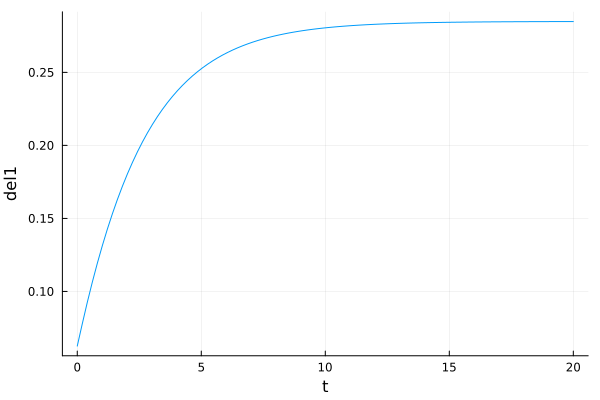

In [998]:
# Pre fault solution plot of del1

p1 = plot(sol1.t, y1, xlabel = "t", ylabel = "del1", legend = false)

# 

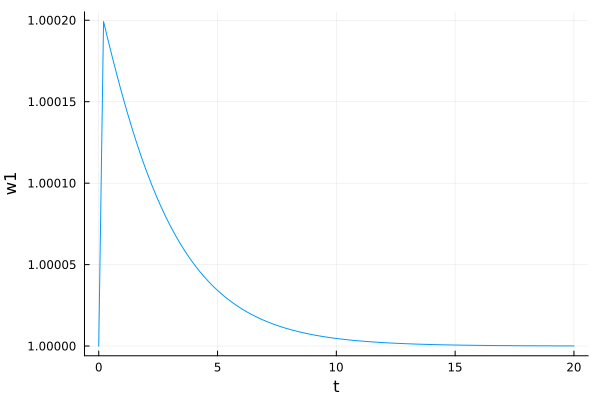

In [999]:
# Pre fault solution plot of w1

p2 = plot(sol1.t, y2, xlabel = "t", ylabel = "w1", legend = false)

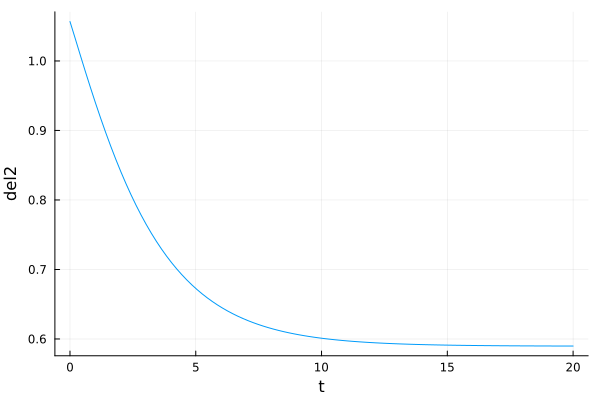

In [1000]:
# Pre fault solution plot of del2

p3 = plot(sol1.t, y3, xlabel = "t", ylabel = "del2", legend = false)

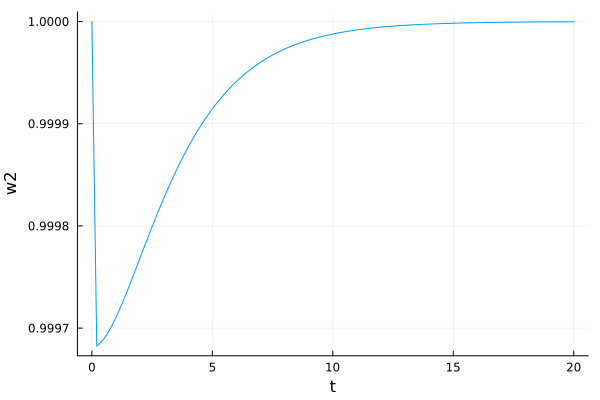

In [1001]:
# Pre fault solution plot of w2


p4 = plot(sol1.t, y4, xlabel = "t", ylabel = "w2", legend = false)

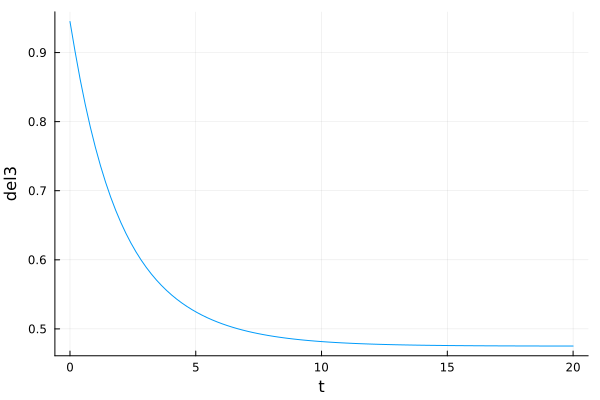

In [1002]:
# Pre fault solution plot of del3

p5 = plot(sol1.t, y5, xlabel = "t", ylabel = "del3", legend = false)

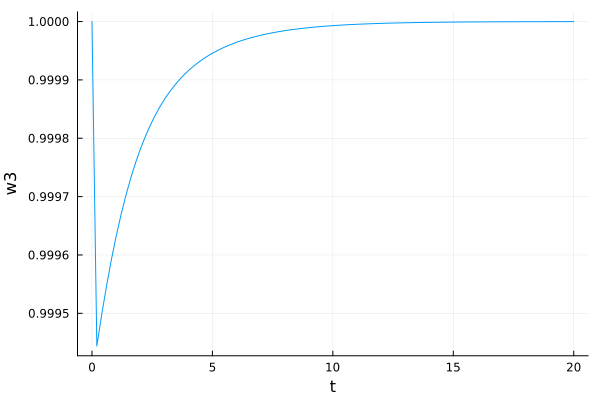

In [1003]:
# Pre fault solution plot of w3

p6 = plot(sol1.t, y6, xlabel = "t", ylabel = "w3", legend = false)

In [1004]:
# Extracting end solution at 10s to feed as initial values for fault on calculation

q=length(sol1.u)
i2=sol1.u[q]

9-element Vector{Float64}:
 0.2848073971055583
 1.0000000824674158
 0.5898211199305939
 0.999999776348394
 0.4751292324353027
 0.9999998709215208
 0.7156666523167087
 1.6305384757368364
 0.8501461642832421

In [1005]:
# Fault on DAE formulation for 10-10.083 seconds using the initial values from the end solution at 10s from pre fault solution
# P_e1,Pe_2 and P_e3 taken from the end solution at 10s from pre fault solution
# New Y matrix taken from BWang's Paper for fault on condition

u20=[i2[1], i2[2], i2[3], i2[4], i2[5], i2[6],   i2[7], i2[8], i2[9]] # del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
tsp2=(10.0, 10.083)
p20=(376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    # Ws, H1, H2, H3,   D1, D2, D3
    0.7164, 1.63, 0.85,   0.0608, 0.1198, 0.1813,       # P_m1, P_m2, P_m3,    X_d_p1, X_d_p2, X_d_p3
    1.0566, 1.0502, 1.0170, 0, 0, 0,                    #e_q_p1, e_q_p2, e_q_p3,    R_a1, R_a2, R_a3
    0.657, 3.816, 0, 0, 0.070, -0.631, -3.816, 0.657, 0, 0, 0.631, 0.070, # a11-a26 of Y
    0, 0, 0, 5.486, 0, 0, 0, 0, -5.486, 0, 0, 0,                          # a31-a46 of Y
    0.070, -0.631, 0, 0, 0.174, 2.796, 0.631, 0.070, 0, 0, -2.796, 0.174) # a51-a56 of Y

prob2=ODEProblem(f, u20, tsp2, p20)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (10.0, 10.083)
u0: 9-element Vector{Float64}:
 0.2848073971055583
 1.0000000824674158
 0.5898211199305939
 0.999999776348394
 0.4751292324353027
 0.9999998709215208
 0.7156666523167087
 1.6305384757368364
 0.8501461642832421

In [1006]:
# prob2=ODEProblem(f, [i2[1], i2[2], i2[3], i2[4], i2[5], i2[6],   i2[7], i2[8], i2[9]  ], (10.0, 10.083), (376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    0.7164, 1.63, 0.85,     0.0608, 0.1198, 0.1813,    1.0566, 1.0502, 1.0170,     0, 0, 0,     0.657, 3.816, 0, 0, 0.070, -0.631,      -3.816, 0.657, 0, 0, 0.631, 0.070,      0, 0, 0, 5.486, 0, 0,      0, 0, -5.486, 0, 0, 0,       0.070, -0.631, 0, 0, 0.174, 2.796,       0.631, 0.070, 0, 0, -2.796, 0.174))

In [1007]:
# Fault on DAE solution of 6 variables (del1, w1, del2, w2, del3, w3)
t_values = range(0,1, length=25)
sol2 = solve(prob2, Rodas5(), reltol = 1e-4, abstol = 1e-4) ;

In [1008]:
t_values = sol2.t
del1_values = [sol2(t)[1] for t in t_values]  
w1_values = [sol2(t)[2] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del1_target_values=", del1_values)
println("omega1_target_values=", w1_values)


del2_values = [sol2(t)[3] for t in t_values]  
w2_values = [sol1(t)[4] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del2_target_values=", del2_values)
println("omega2_target_values=", w2_values)



del3_values = [sol1(t)[5] for t in t_values]  
w3_values = [sol1(t)[6] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del3_target_values=", del3_values)
println("omega3_target_values=", w3_values)

del1_target_values=[0.2848073971055583, 0.28480739713679365, 0.2848073974651847, 0.28480740234169005, 0.28480759980626236, 0.2848097797618473, 0.28481595653964353, 0.28482623630467085, 0.28484242321408093, 0.2848671219182551, 0.28490892575231713, 0.28494191550159625]
omega1_target_values=[1.0000000824674158, 1.0000000832413822, 1.0000000909730276, 1.0000001674932726, 1.0000008584348956, 1.0000024241479621, 1.0000035668358935, 1.0000041019198125, 1.000004356787926, 1.0000045501492953, 1.0000048264908605, 1.0000050318171818]
del2_target_values=[0.5898211199305939, 0.5898211198702893, 0.5898211219065382, 0.5898214043669395, 0.5898486993868722, 0.5901896924711489, 0.591173887878792, 0.5928050739668145, 0.5953295692921413, 0.5990644959429725, 0.6050871490748113, 0.6096085760893435]
omega2_target_values=[0.9999878133698015, 0.9999878133746538, 0.9999878134231768, 0.9999878139084065, 0.9999878187607035, 0.9999878350502798, 0.9999878608164893, 0.9999878948852595, 0.9999879439055429, 0.99998801

del3_target_values=[0.4816109468040501, 0.48161094415910216, 0.4816109177096229, 0.48161065321483, 0.48160800826690114, 0.4815991289504001, 0.4815850839975865, 0.4815665133859645, 0.481539792825301, 0.4815009226932827, 0.4814383715207518, 0.481391416125958]
omega3_target_values=[0.9999929812700146, 0.9999929812728321, 0.9999929813010081, 0.9999929815827675, 0.9999929844003624, 0.9999929938592694, 0.9999930088209956, 0.9999930286037896, 0.9999930570685142, 0.9999930984758638, 0.9999931651100157, 0.9999932151303875]


In [1009]:
# Extracting fault on solution for 6 variables plotting

y7 = sol2[1, :];
y8 = sol2[2, :];
y9 = sol2[3, :];
y10 = sol2[4, :];
y11 = sol2[5, :];
y12 = sol2[6, :];

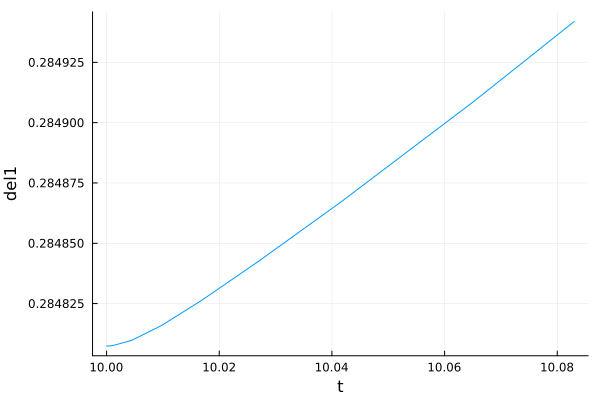

In [1011]:
# Fault on solution plot of del1

p7 = plot(sol2.t, y7, xlabel = "t", ylabel = "del1", legend = false)

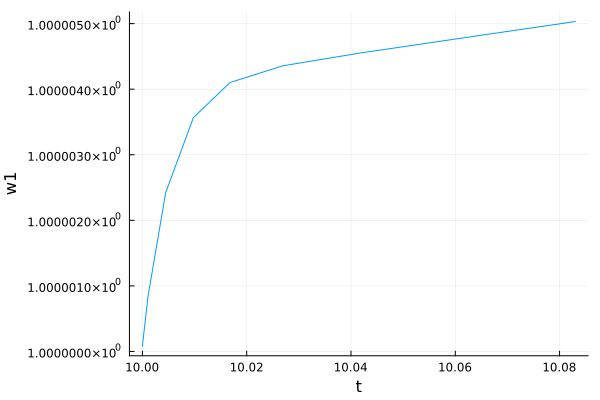

In [1012]:
# Fault on solution plot of w1

p8 = plot(sol2.t, y8, xlabel = "t", ylabel = "w1", legend = false)

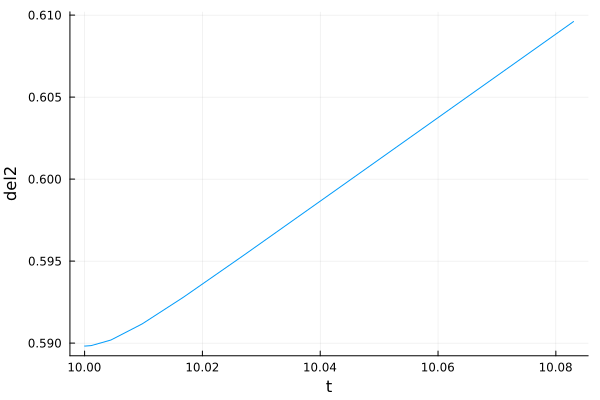

In [1013]:
# Fault on solution plot of del2

p9 = plot(sol2.t, y9, xlabel = "t", ylabel = "del2", legend = false)

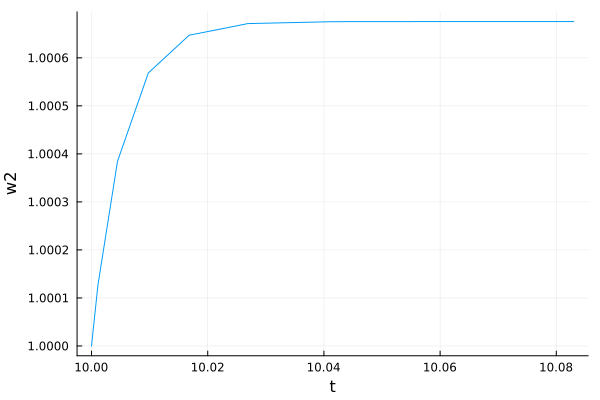

In [1014]:
# Fault on solution plot of w2

p10 = plot(sol2.t, y10, xlabel = "t", ylabel = "w2", legend = false)

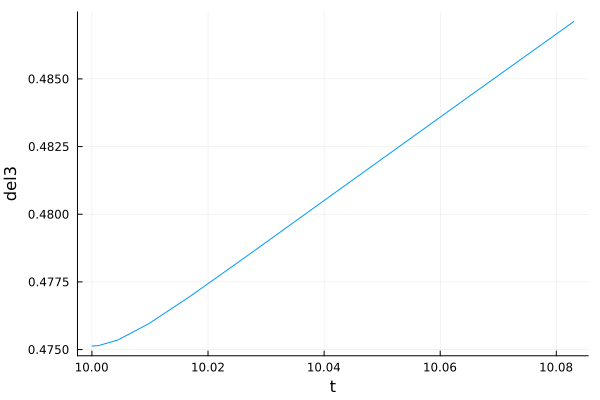

In [1015]:
# Fault on solution plot of del3

p11 = plot(sol2.t, y11, xlabel = "t", ylabel = "del3", legend = false)

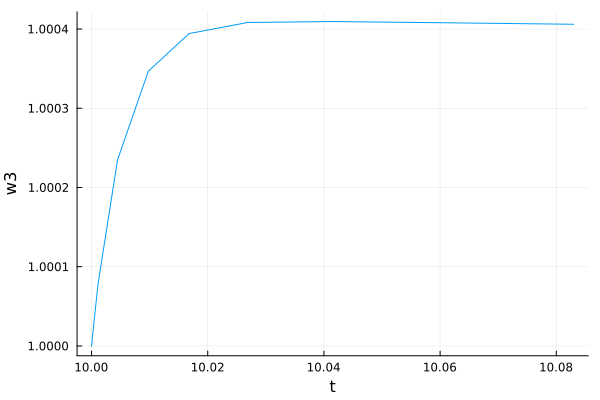

In [1016]:
# Fault on solution plot of w3

p12 = plot(sol2.t, y12, xlabel = "t", ylabel = "w3", legend = false)

In [1017]:
# Extracting end solution at 10.083s to feed as initial values for post fault calculation

q1=length(sol2.u)
i3=sol2.u[q1]

9-element Vector{Float64}:
 0.28494191550159625
 1.0000050318171818
 0.6096085760893435
 1.0006755795190188
 0.48711892105304333
 1.0004060071930203
 0.6710105438828898
 2.1856666923247751e-16
 0.38980741604960284

In [1018]:
# post fault DAE formulation for 10.083-20 seconds using the initial values from the end solution at 10.086s from fault on solution
# P_e1,Pe_2 and P_e3 taken from the end solution at 10.086s from fault on solution
# New Y matrix taken from BWang's Paper for post fault condition


u30=[i3[1], i3[2], i3[3], i3[4], i3[5], i3[6],   i3[7], i3[8], i3[9]] # del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
tsp3=(10.083, 20.0)
p30=(376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    # Ws, H1, H2, H3,   D1, D2, D3
    0.7164, 1.63, 0.85,   0.0608, 0.1198, 0.1813,       # P_m1, P_m2, P_m3,    X_d_p1, X_d_p2, X_d_p3
    1.0566, 1.0502, 1.0170, 0, 0, 0,                    #e_q_p1, e_q_p2, e_q_p3,    R_a1, R_a2, R_a3
    1.181, 2.229, 0.138, -0.726, 0.191, -1.079, -2.229, 1.181, 0.726, 0.138, 1.079, 0.191,   # a11-a26 of Y
    0.138, -0.726, 0.389, 1.953, 0.199, -1.229, 0.726, 0.138, -1.953, 0.389, 1.229, 0.199,   # a31-a46 of Y
    0.191, -1.079, 0.199, -1.299, 0.273, 2.342, 1.079, 0.191, 0.174, 0.199, -2.342, 0.273)   # a51-a56 of Y

prob3=ODEProblem(f, u30, tsp3, p30)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (10.083, 20.0)
u0: 9-element Vector{Float64}:
 0.28494191550159625
 1.0000050318171818
 0.6096085760893435
 1.0006755795190188
 0.48711892105304333
 1.0004060071930203
 0.6710105438828898
 2.1856666923247751e-16
 0.38980741604960284

In [1019]:
# prob3=ODEProblem(f, [i3[1], i3[2], i3[3], i3[4], i3[5], i3[6],   i3[7], i3[8], i3[9]  ], (10.083, 20), (376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    0.7164, 1.63, 0.85,     0.0608, 0.1198, 0.1813,    1.0566, 1.0502, 1.0170,     0, 0, 0,     1.181, 2.229, 0.138, -0.726, 0.191, -1.079,      -2.229, 1.181, 0.726, 0.138, 1.079, 0.191,      0.138, -0.726, 0.389, 1.953, 0.199, -1.229,       0.726, 0.138, -1.953, 0.389, 1.229, 0.199,       0.191, -1.079, 0.199, -1.299, 0.273, 2.342,       1.079, 0.191, 0.174, 0.199, -2.342, 0.273))


In [1020]:
# Post fault DAE solution of 6 variables (del1, w1, del2, w2, del3, w3)

sol3 = solve(prob3, Rodas5(), reltol = 1e-4, abstol = 1e-4) ;

In [1021]:
# Extracting post fault solution for 6 variables plotting

y13 = sol3[1, :];
y14 = sol3[2, :];
y15 = sol3[3, :];
y16 = sol3[4, :];
y17 = sol3[5, :];
y18 = sol3[6, :];


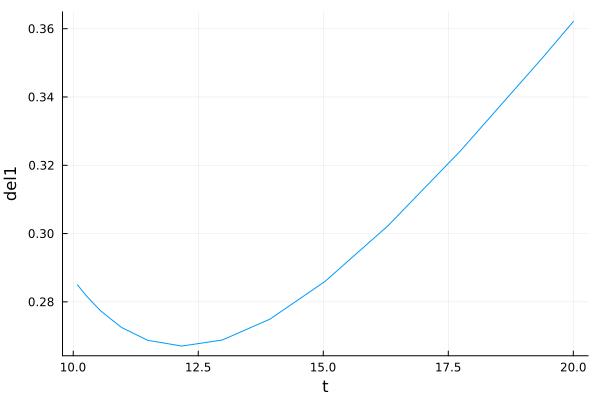

In [1022]:
# post fault solution plot of del1

p13 = plot(sol3.t, y13, xlabel = "t", ylabel = "del1", legend = false)

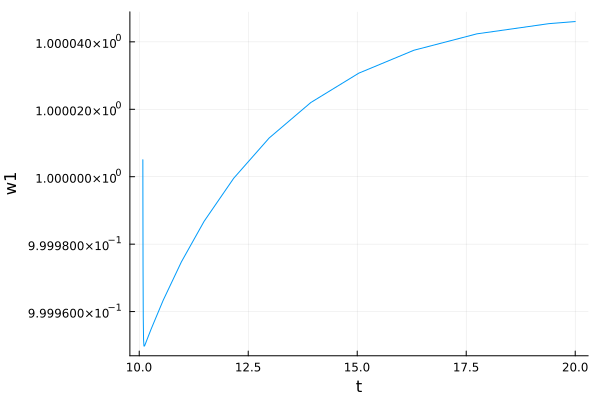

In [1023]:
# post fault solution plot of w1

p14 = plot(sol3.t, y14, xlabel = "t", ylabel = "w1", legend = false)

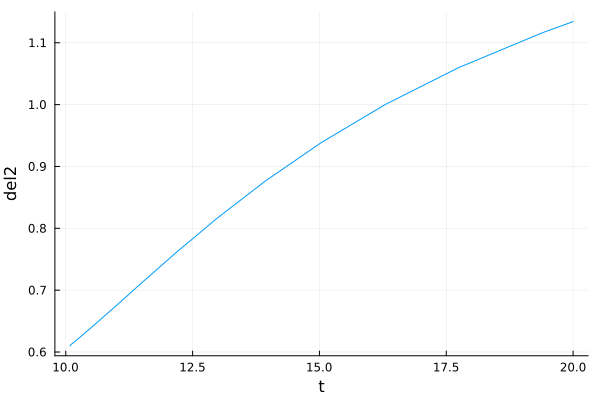

In [1024]:
# post fault solution plot of del2

p15 = plot(sol3.t, y15, xlabel = "t", ylabel = "del2", legend = false)

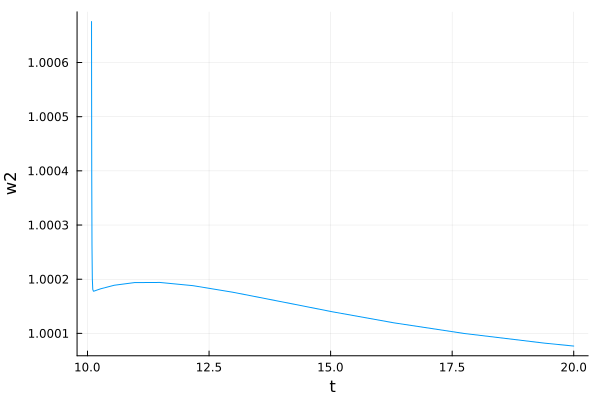

In [1025]:
# post fault solution plot of w2

p16 = plot(sol3.t, y16, xlabel = "t", ylabel = "w2", legend = false)

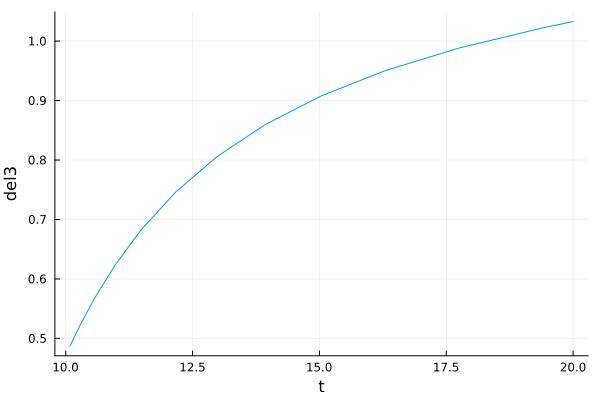

In [1026]:
# post fault solution plot of del3

p17 = plot(sol3.t, y17, xlabel = "t", ylabel = "del3", legend = false)

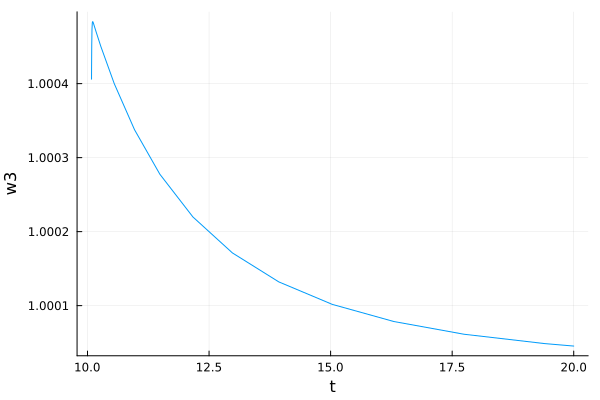

In [1027]:
# post fault solution plot of w3

p18 =plot(sol3.t, y18, xlabel = "t", ylabel = "w3", legend = false)

In [1028]:
# Combining pre fault, fault on and post fault solution to plot all three soultion together for 0-20 seconds

combined_t = vcat(sol1.t, sol2.t, sol3.t )  
combined_y1 = vcat(y1, y7, y13)
combined_y2 = vcat(y2, y8, y14)
combined_y3 = vcat(y3, y9, y15)
combined_y4 = vcat(y4, y10, y16)
combined_y5 = vcat(y5, y11, y17)
combined_y6 = vcat(y6, y12, y18);

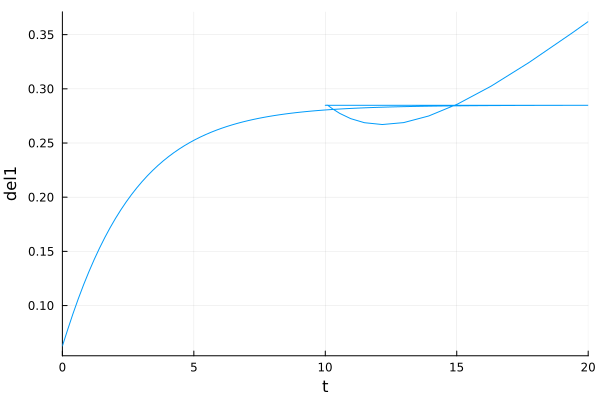

In [1029]:
# Final plot of del1 from 0 to 20 seconds under pre fault, fault on and post fault condition






fdel1=plot(combined_t, combined_y1, xlabel = "t", ylabel = "del1", legend = false, xlims = (0, 20))

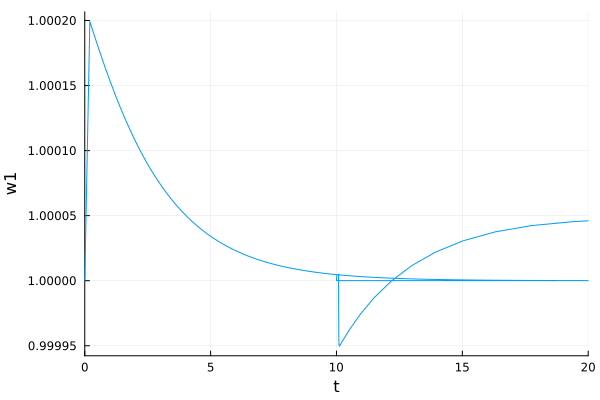

In [1030]:
# Final plot of w1 from 0 to 15 seconds under pre fault, fault on and post fault condition

fw1=plot(combined_t, combined_y2, xlabel = "t", ylabel = "w1", legend = false, xlims = (0, 20))

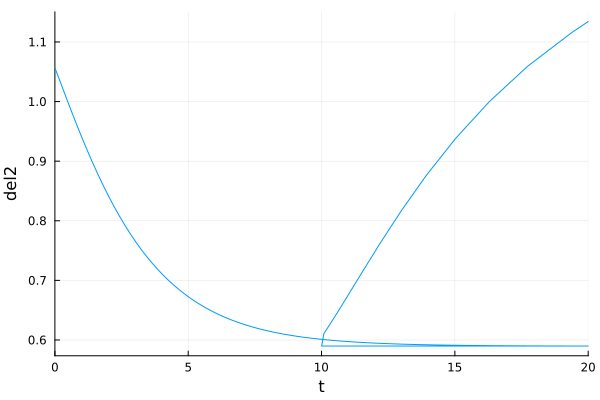

In [1031]:
# Final plot of del2 from 0 to 15 seconds under pre fault, fault on and post fault condition

fdel2=plot(combined_t, combined_y3, xlabel = "t", ylabel = "del2", legend = false, xlims = (0, 20))

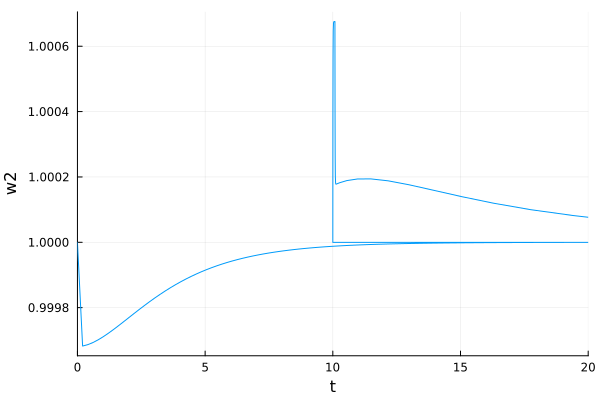

In [1032]:
# Final plot of w2 from 0 to 15 seconds under pre fault, fault on and post fault condition

fw2=plot(combined_t, combined_y4, xlabel = "t", ylabel = "w2", legend = false, xlims = (0, 20))

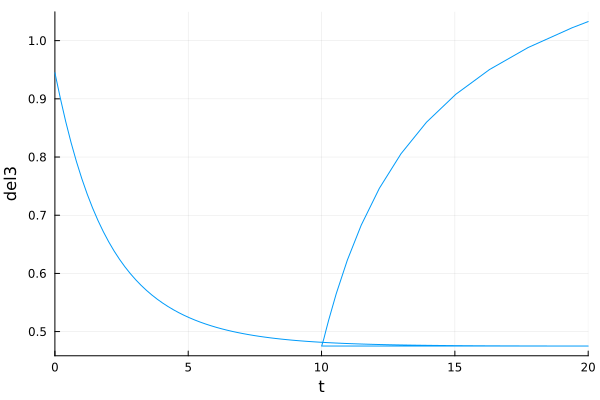

In [1033]:
# Final plot of del3 from 0 to 15 seconds under pre fault, fault on and post fault condition

fdel3=plot(combined_t, combined_y5, xlabel = "t", ylabel = "del3", legend = false, xlims = (0, 20))

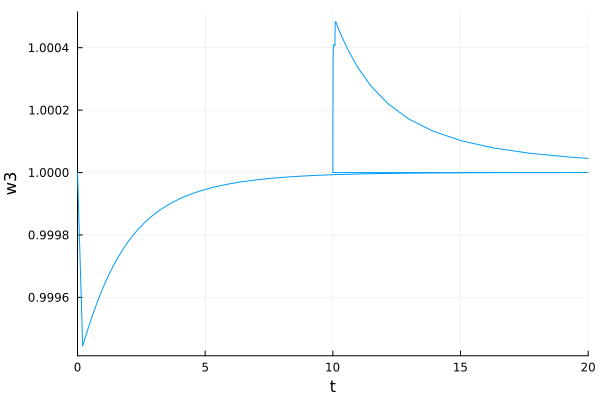

In [1034]:
# Final plot of w3 from 0 to 15 seconds under pre fault, fault on and post fault condition

fw3=plot(combined_t, combined_y6, xlabel = "t", ylabel = "w3", legend = false, xlims = (0, 20))

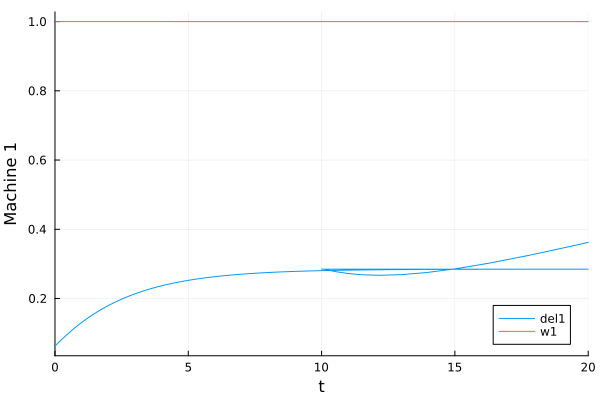

In [1035]:
# Machine 1 variables (del1, w1) plot

plot(combined_t, combined_y1, xlabel = "t", ylabel = "Machine 1", label="del1", xlims=(0, 20), legend=true)
plot!(combined_t, combined_y2,  label="w1", xlims=(0, 20), legend=true)



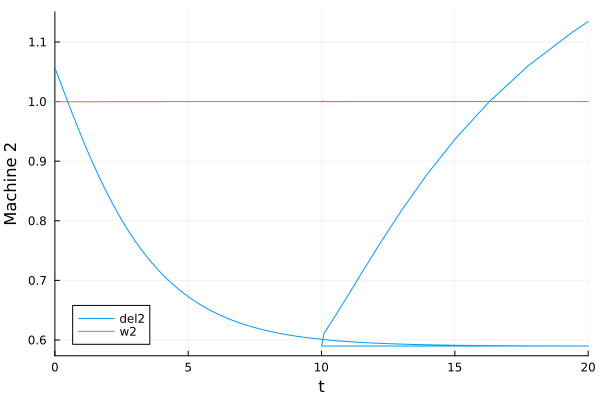

In [1036]:
# Machine 2 variables (del2, w2) plot

plot(combined_t, combined_y3, xlabel = "t", ylabel = "Machine 2", label="del2", xlims=(0, 20), legend=true)
plot!(combined_t, combined_y4,  label="w2", xlims=(0, 20), legend=true)

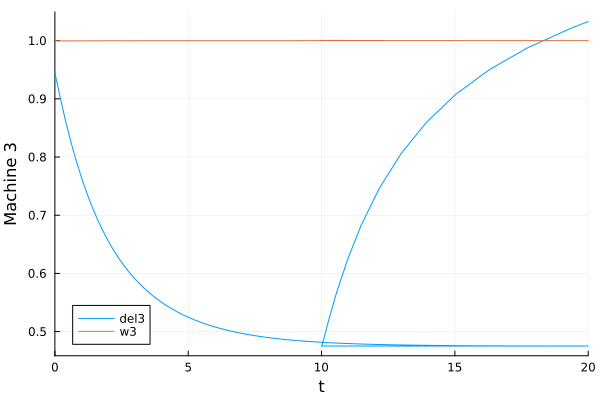

In [1037]:
# Machine 2 variables (del3, w3) plot

plot(combined_t, combined_y5, xlabel = "t", ylabel = "Machine 3", label="del3", xlims=(0, 20), legend=true)
plot!(combined_t, combined_y6,  label="w3", xlims=(0, 20), legend=true)